In [30]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import numpy as np

###### ArCo ARMADO DE LA BASE#######
import os
from typing import List
from datetime import datetime

# Establecer el directorio de trabajo
os.chdir("C:/Users/supegui/Documents/Metodología ArCo/Python/Excel")
# Saca la lista de archivos del directorio de trabajo
#os.listdir()
# Obtener la fecha actual
fecha_actual = datetime.now().strftime("%Y %m %d")
#print(fecha_actual)

# Construir el nombre del archivo basado en la fecha actual
#nombre_archivo = f"{fecha_actual} Informe ArCo.xlsx"

# Construir el nombre del archivo cuando la fecha no es la actual. Aquí solo se modifica la fecha. 
nombre_archivo = "2024 10 28 - Base Original.xlsx"


In [31]:
data_arco = pd.read_excel(nombre_archivo)

In [33]:
data_arco.head()

data_arco.shape


(418, 71)

In [34]:
# Tipos de usuario, apoyo y objetivos que mencionaste
tipos_usuario = ["Emprendedores", "Mipymes", "Grandes empresas", "Gobierno ",
                 "Academia", "Entidades de soporte", "Personas naturales"]

tipos_apoyo = ['Formación de Talento Humano', 'Tipo de Sistemas de Información', 
               'Asistencia técnica y Consultoría', 'Tipo de Redes de Colaboración', 
               'Apoyo Financiero', 'Incentivos Tributarios', 'Eventos', 'Compra Pública', 
               'Bonos o Vouchers', 'Premios y Reconocimientos', 'Instrumentos Regulatorios']

objetivos_politica = ["Innovación", "Emprendimiento", "Economía Popular",
                      "Transferencia de Conocimiento y Tecnología", "Investigación",
                      "Formación de Capital Humano", "Propiedad intelectual", "Calidad",
                      "Clúster o encadenamientos", "Financiación", "Comercialización",
                      "Formalización", "Crecimiento Sostenible", "Inclusión Financiera",
                      "Comercio Electrónico", "Educación económica y financiera", 
                      "Competencias Digitales"]


## Análisis - Tipos de usuarios 

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

#2022
# Set working directory
#os.chdir("C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Filtro colaborativo/Excel")

# Import data
#data = pd.read_excel("Base 2022.xlsx", sheet_name="Microdato")

C:\Users\supegui\AppData\Local\Temp\ipykernel_30780\782475543.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df[columns].applymap(lambda x: 1 if x in ["Si", np.nan] else 0)



Tipos de usuario para 'Fábricas de Productividad y Sostenibilidad':
- Mipymes
- Grandes empresas
- Gobierno 
- Academia
- Entidades de soporte

Instrumentos más similares a 'Fábricas de Productividad y Sostenibilidad' según tipo de usuario:
                                               Instrumento Similitud                                                     Tipos de Usuario
                                MegaiNN Innovación Abierta   100.00% Mipymes, Grandes empresas, Gobierno , Academia, Entidades de soporte
             OPA: Asistencia técnica sobre Población Sorda   100.00% Mipymes, Grandes empresas, Gobierno , Academia, Entidades de soporte
Convocatoria Pública para Comisiones Mixtas de Cooperación   100.00% Mipymes, Grandes empresas, Gobierno , Academia, Entidades de soporte
     Mecanismo Tripartito GIZ/Unión Europea/APC - Colombia   100.00% Mipymes, Grandes empresas, Gobierno , Academia, Entidades de soporte
                        Calibración y Medición Metrológica   100.00%

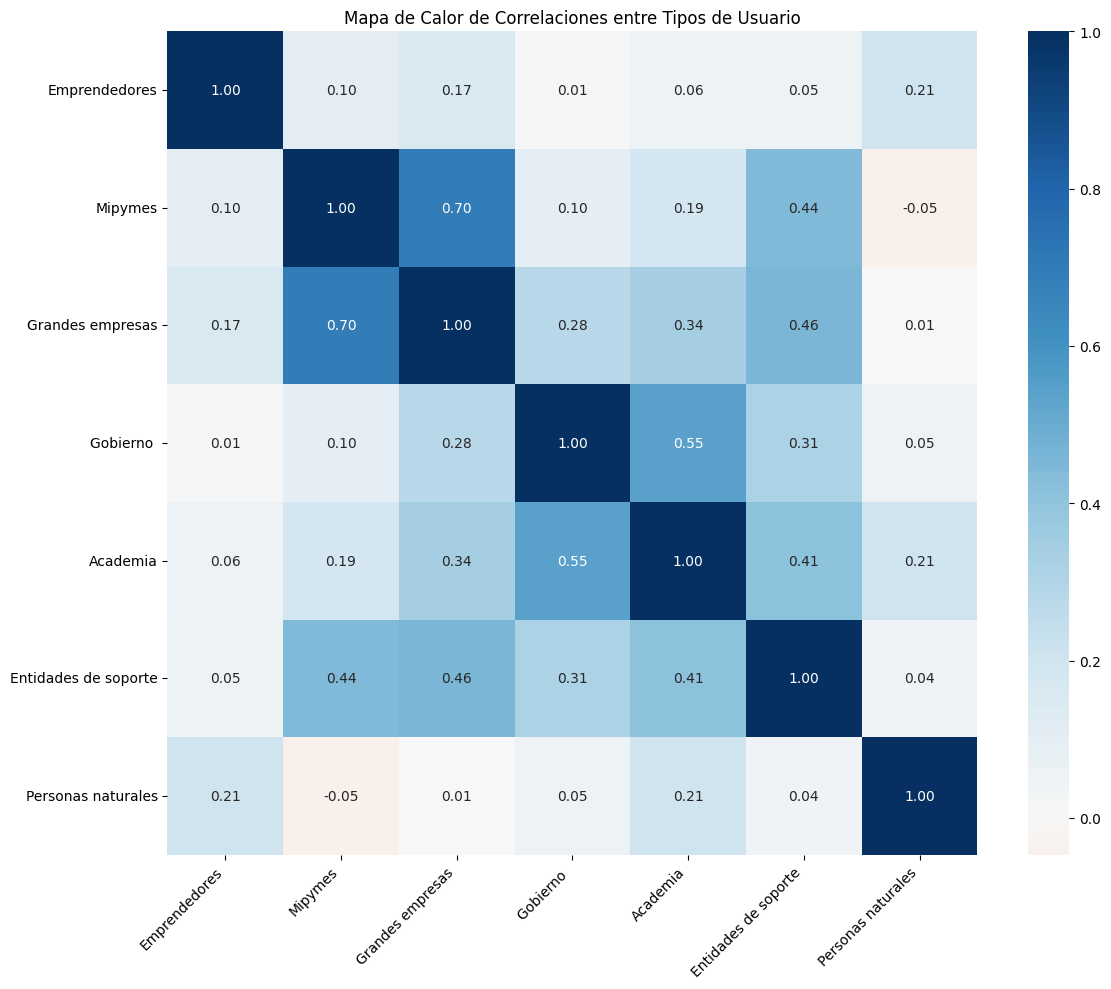


Estadísticas de correlaciones:
Correlación promedio: 0.221
Correlación máxima: 0.696
Correlación mínima: -0.047

Distribución de correlaciones:
Rango
Muy negativa         0
Negativa moderada    0
Negativa débil       0
Sin correlación      8
Positiva débil       6
Positiva moderada    5
Positiva fuerte      2
Name: count, dtype: int64


In [36]:
"""import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os
import seaborn as sns
import matplotlib.pyplot as plt
"""
# Set working directory
#os.chdir("C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Filtro colaborativo/Excel")

# Import data
#data = pd.read_excel("Base 2022.xlsx")

# Prepare data for user type
def prepare_data(df, columns):
    return df[columns].applymap(lambda x: 1 if x in ["Si", np.nan] else 0)

"""
# Prepare user type matrix - 2022
user_type_columns = [
    "Emprendedor", 
    "MiPymes", 
    "Grandes empresas", 
    "Gobierno", 
    "Academia", 
    "Entidades de Soporte ", 
    "Personas Naturales"
]
"""



"""# Prepare user type matrix - 2023
user_type_columns = [
    "Emprendedores", 
    "Mipymes", 
    "Grandes empresas", 
    "Gobierno ", 
    "Academia", 
    "Entidades de soporte", 
    "Personas naturales"
]
"""


"""# Prepare user type matrix - 2024
user_type_columns = [
    "Emprendedores", 
    "Mipymes", 
    "Grandes empresas", 
    "Gobierno ", 
    "Academia", 
    "Entidades de soporte", 
    "Personas naturales"
]
"""


# Prepare user type matrix - 2025
user_type_columns = [
    "Emprendedores", 
    "Mipymes", 
    "Grandes empresas", 
    "Gobierno ", 
    "Academia", 
    "Entidades de soporte", 
    "Personas naturales"
]

tip_usu = prepare_data(data_arco, user_type_columns)

def get_similar_by_user_type(instrument_name, top_n=5):
    """
    Encuentra instrumentos similares basados en el tipo de usuario.
    
    Parameters:
    instrument_name (str): Nombre del instrumento a comparar
    top_n (int): Número de recomendaciones a devolver
    
    Returns:
    DataFrame: Top N instrumentos similares con sus puntuaciones y detalles
    """
    # Verificar si el instrumento existe 
    if instrument_name not in data_arco['Nombre del Instrumento'].values:
        return f"El instrumento '{instrument_name}' no se encuentra en la base de datos."
    
    # Obtener el índice del instrumento
    idx = data_arco[data_arco['Nombre del Instrumento'] == instrument_name].index[0]
    
    # Calcular matriz de similitud
    sim_matrix = cosine_similarity(tip_usu)
    
    # Obtener similitudes para el instrumento específico
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # Filtrar el instrumento mismo y ordenar por similitud
    sim_scores = [x for x in sim_scores if x[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener los top N más similares
    top_indices = [x[0] for x in sim_scores[:top_n]]
    top_scores = [x[1] for x in sim_scores[:top_n]]
    
    # Crear DataFrame con resultados detallados
    recommendations = pd.DataFrame({
        'Instrumento': data_arco['Nombre del Instrumento'].iloc[top_indices],
        'Puntuación de Similitud': [f"{score:.2%}" for score in top_scores]
    })
    
    # Agregar detalles de tipos de usuario para el instrumento original
    print(f"\nTipos de usuario para '{instrument_name}':")
    original_users = tip_usu.iloc[idx]
    for col, val in original_users.items():
        if val == 1:
            print(f"- {col}")
    
    # Agregar detalles para cada recomendación
    detailed_recommendations = []
    for i, idx in enumerate(top_indices):
        instrument_data = {
            'Instrumento': data_arco['Nombre del Instrumento'].iloc[idx],
            'Similitud': f"{top_scores[i]:.2%}",
            'Tipos de Usuario': ', '.join([col for col, val in tip_usu.iloc[idx].items() if val == 1])
        }
        detailed_recommendations.append(instrument_data)
    
    detailed_df = pd.DataFrame(detailed_recommendations)
    
    return detailed_df

# Ejemplo de uso
instrumento = "Fábricas de Productividad y Sostenibilidad"
resultados = get_similar_by_user_type(instrumento)
print(f"\nInstrumentos más similares a '{instrumento}' según tipo de usuario:")
print(resultados.to_string(index=False))

# Análisis adicional de la matriz de tipos de usuario
print("\nEstadísticas de tipos de usuario:")
user_type_stats = tip_usu.sum().sort_values(ascending=False)
print("\nNúmero de instrumentos por tipo de usuario:")
for user_type, count in user_type_stats.items():
    print(f"{user_type}: {count}")

# Calcular correlaciones entre tipos de usuario
#correlations = tip_usu.corr()
#print("\nCorrelaciones más fuertes entre tipos de usuario:")
#for i in range(len(user_type_columns)):
#    for j in range(i+1, len(user_type_columns)):
#        corr = correlations.iloc[i,j]
#        if abs(corr) > 0.3:  # Mostrar solo correlaciones significativas
#            print(f"{user_type_columns[i]} - {user_type_columns[j]}: {corr:.3f}")4


# Calcular correlaciones
correlations = tip_usu.corr()

# Mostrar todas las correlaciones ordenadas de mayor a menor
correlations_list = []
for i in range(len(user_type_columns)):
    for j in range(i+1, len(user_type_columns)):
        corr = correlations.iloc[i,j]
        correlations_list.append({
            'Tipo 1': user_type_columns[i],
            'Tipo 2': user_type_columns[j],
            'Correlación': corr
        })

# Convertir a DataFrame y ordenar
corr_df = pd.DataFrame(correlations_list)
corr_df = corr_df.sort_values('Correlación', ascending=False)

print("Todas las correlaciones ordenadas de mayor a menor:")
print(corr_df.to_string(index=False))

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, 
            annot=True, 
            cmap='RdBu', 
            center=0,
            fmt='.2f',
            xticklabels=user_type_columns,
            yticklabels=user_type_columns)
plt.title('Mapa de Calor de Correlaciones entre Tipos de Usuario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis estadístico adicional
print("\nEstadísticas de correlaciones:")
print(f"Correlación promedio: {corr_df['Correlación'].mean():.3f}")
print(f"Correlación máxima: {corr_df['Correlación'].max():.3f}")
print(f"Correlación mínima: {corr_df['Correlación'].min():.3f}")

# Mostrar distribución de correlaciones por rangos
print("\nDistribución de correlaciones:")
ranges = [-1, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1]
labels = ['Muy negativa', 'Negativa moderada', 'Negativa débil', 
          'Sin correlación', 'Positiva débil', 'Positiva moderada', 'Positiva fuerte']
corr_df['Rango'] = pd.cut(corr_df['Correlación'], bins=ranges, labels=labels)
print(corr_df['Rango'].value_counts().sort_index())

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_all_similarities(data_arco, tip_usu):
    """
    Calcula la similitud entre todos los pares de instrumentos.
    
    Parameters:
    data_arco (DataFrame): DataFrame con la información de los instrumentos
    tip_usu (DataFrame): Matriz de tipos de usuario preparada
    
    Returns:
    DataFrame: DataFrame con todos los pares de instrumentos y sus similitudes
    """
    # Calcular matriz de similitud
    sim_matrix = cosine_similarity(tip_usu)
    
    # Crear lista para almacenar todos los pares
    similarity_pairs = []
    
    # Obtener nombres de instrumentos
    instrument_names = data_arco['Nombre del Instrumento'].values
    
    # Crear pares de similitud
    for i in range(len(sim_matrix)):
        for j in range(i + 1, len(sim_matrix)):  # Solo la mitad superior de la matriz
            similarity_pairs.append({
                'Instrumento1': instrument_names[i],
                'Instrumento2': instrument_names[j],
                'Similitud': sim_matrix[i][j]
            })
    
    # Convertir a DataFrame y ordenar por similitud
    similarity_df = pd.DataFrame(similarity_pairs)
    similarity_df = similarity_df.sort_values('Similitud', ascending=False)
    
    # Convertir similitud a porcentaje
    similarity_df['Similitud'] = similarity_df['Similitud'].apply(lambda x: f"{x:.2%}")
    
    return similarity_df

def create_rating_column(similarity_df, threshold=0.7):
    """
    Crea una columna de rating basada en los porcentajes de similitud.
    
    Parameters:
    similarity_df (DataFrame): DataFrame con los pares de similitud
    threshold (float): Umbral para considerar una similitud alta
    
    Returns:
    DataFrame: DataFrame original con la columna de rating añadida
    """
    # Convertir similitud de string a float
    similarity_df['Similitud_num'] = similarity_df['Similitud'].str.rstrip('%').astype(float) / 100
    
    # Crear columna de rating
    similarity_df['Rating'] = similarity_df['Similitud_num'].apply(
        lambda x: 5 if x >= threshold else round(x * 5 / threshold, 1)
    )
    
    # Eliminar columna auxiliar
    similarity_df = similarity_df.drop('Similitud_num', axis=1)
    
    return similarity_df

# Ejemplo de uso:
def main(data_arco, tip_usu):
    # Calcular todas las similitudes
    similarity_pairs = calculate_all_similarities(data_arco, tip_usu)
    
    # Añadir columna de rating
    similarity_pairs = create_rating_column(similarity_pairs)
    
    # Mostrar las primeras filas
    print("\nPrimeros pares de instrumentos con mayor similitud:")
    print(similarity_pairs.head(50).to_string(index=False))
    
    # Estadísticas básicas
    ratings = similarity_pairs['Rating'].describe()
    print("\nEstadísticas de los ratings:")
    print(ratings)
    
    return similarity_pairs

# Para ejecutar el código:
# similarity_results = main(data_arco, tip_usu)

In [48]:
# Para ejecutar el código:
similarity_results = main(data_arco, tip_usu)


Primeros pares de instrumentos con mayor similitud:
                                                                                                               Instrumento1                                                                                                                                           Instrumento2 Similitud  Rating
                                                                           Información estadística de la temática económica                                                                                                                 Registro Nacional del Derecho de Autor   100.00%     5.0
                                                                             Cuenta Satélite de Cultura y Economía Creativa                                                                                                                                       Portal INNOVAMOS   100.00%     5.0
                                                             Fomento

In [46]:
similarity_results['Rating']

similarity_results = similarity_results[(similarity_results['Rating'] >= 2) & (similarity_results['Rating'] <= 5)]

similarity_results.shape

similarity_results.head()

,Instrumento1,Instrumento2,Similitud,Rating
1172,Información estadística de la temática económica,Registro Nacional del Derecho de Autor,100.00%,5.0
14863,Cuenta Satélite de Cultura y Economía Creativa,Portal INNOVAMOS,100.00%,5.0
2158,Fomento de Innovación y Desarrollo Tecnológico...,Educación Financiera - Finagro Educa 2.0,100.00%,5.0
2159,Fomento de Innovación y Desarrollo Tecnológico...,Programa Nacional de Escuelas Taller,100.00%,5.0
47009,"Servicios de asistencia técnica, para el forta...",Sistema de seguimiento presupuestal - SEPRE,100.00%,5.0


In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def calculate_correlation_based_rating(data_arco, tip_usu):
    """
    Calcula ratings basados en las correlaciones entre tipos de usuarios.
    
    Parameters:
    data_arco (DataFrame): DataFrame con la información de los instrumentos
    tip_usu (DataFrame): Matriz de tipos de usuario preparada
    
    Returns:
    DataFrame: DataFrame con los pares de instrumentos y sus ratings basados en correlación
    """
    # Calcular matriz de correlación entre tipos de usuario
    correlations = tip_usu.corr()
    
    # Crear lista para almacenar todos los pares
    correlation_pairs = []
    instrument_names = data_arco['Nombre del Instrumento'].values
    
    for i in range(len(tip_usu)):
        for j in range(i + 1, len(tip_usu)):
            # Obtener los perfiles de usuario de ambos instrumentos
            profile1 = tip_usu.iloc[i]
            profile2 = tip_usu.iloc[j]
            
            # Calcular score basado en correlaciones
            correlation_score = 0
            common_users = 0
            
            # Para cada par de tipos de usuario presentes en ambos instrumentos
            for type1 in user_type_columns:
                for type2 in user_type_columns:
                    if profile1[type1] == 1 and profile2[type2] == 1:
                        correlation_score += correlations.loc[type1, type2]
                        common_users += 1
            
            # Normalizar score por el número de usuarios comunes si existen
            final_score = correlation_score / common_users if common_users > 0 else 0
            
            correlation_pairs.append({
                'Instrumento1': instrument_names[i],
                'Instrumento2': instrument_names[j],
                'Score': final_score,
                'Usuarios_Comunes': common_users
            })
    
    # Convertir a DataFrame
    correlation_df = pd.DataFrame(correlation_pairs)
    
    # Normalizar scores a escala 1-5 usando MinMaxScaler
    scaler = MinMaxScaler(feature_range=(1, 5))
    correlation_df['Rating'] = scaler.fit_transform(
        correlation_df['Score'].values.reshape(-1, 1)
    ).round(1)
    
    # Ordenar por Rating descendente
    correlation_df = correlation_df.sort_values('Rating', ascending=False)
    
    return correlation_df

def analyze_ratings(correlation_df):
    """
    Analiza la distribución de ratings y proporciona estadísticas útiles.
    
    Parameters:
    correlation_df (DataFrame): DataFrame con los ratings calculados
    
    Returns:
    dict: Diccionario con estadísticas de los ratings
    """
    stats = {
        'basic_stats': correlation_df['Rating'].describe(),
        'distribution': correlation_df['Rating'].value_counts().sort_index(),
        'correlation_stats': {
            'mean_users_common': correlation_df['Usuarios_Comunes'].mean(),
            'max_users_common': correlation_df['Usuarios_Comunes'].max(),
            'min_users_common': correlation_df['Usuarios_Comunes'].min()
        }
    }
    
    return stats

def main_correlation_based(data_arco, tip_usu, user_type_columns):
    """
    Función principal que ejecuta todo el análisis basado en correlaciones.
    """
    # Calcular ratings basados en correlación
    correlation_results = calculate_correlation_based_rating(data_arco, tip_usu)
    
    # Analizar resultados
    stats = analyze_ratings(correlation_results)
    
    # Mostrar resultados
    print("\nPrimeros pares de instrumentos con mayores ratings basados en correlación:")
    print(correlation_results[['Instrumento1', 'Instrumento2', 'Rating', 'Usuarios_Comunes']]
          .head(10).to_string(index=False))
    
    print("\nEstadísticas básicas de los ratings:")
    print(stats['basic_stats'])
    
    print("\nDistribución de ratings:")
    print(stats['distribution'])
    
    print("\nEstadísticas de usuarios comunes:")
    for key, value in stats['correlation_stats'].items():
        print(f"{key}: {value:.2f}")
    
    return correlation_results, stats

# Ejemplo de uso:
#correlation_results, stats = main_correlation_based(data_arco, tip_usu, user_type_columns)

def compare_ratings(similarity_results, correlation_results):
    """
    Compara los ratings obtenidos por ambos métodos.
    
    Parameters:
    similarity_results (DataFrame): Resultados del método basado en similitud
    correlation_results (DataFrame): Resultados del método basado en correlación
    
    Returns:
    DataFrame: DataFrame con la comparación de ratings
    """
    # Crear identificadores únicos para cada par
    def create_pair_id(row):
        return tuple(sorted([row['Instrumento1'], row['Instrumento2']]))
    
    similarity_results['pair_id'] = similarity_results.apply(create_pair_id, axis=1)
    correlation_results['pair_id'] = correlation_results.apply(create_pair_id, axis=1)
    
    # Merge de los resultados
    comparison = pd.merge(
        similarity_results[['pair_id', 'Rating']].rename(columns={'Rating': 'Rating_Similitud'}),
        correlation_results[['pair_id', 'Rating']].rename(columns={'Rating': 'Rating_Correlacion'}),
        on='pair_id'
    )
    
    # Calcular diferencia
    comparison['Diferencia'] = comparison['Rating_Similitud'] - comparison['Rating_Correlacion']
    
    # Ordenar por diferencia absoluta
    comparison = comparison.sort_values('Diferencia', key=abs, ascending=False)
    
    return comparison

# Para comparar ambos métodos:
comparison = compare_ratings(similarity_results, correlation_results)

In [67]:
#print(correlation_results[['Instrumento1', 'Instrumento2', 'Rating']].to_string(index=False))
#print(correlation_results[['Instrumento1', 'Instrumento2', 'Rating', 'Score', 'Usuarios_Comunes']])
#print(similarity_results[['Instrumento1', 'Instrumento2', 'Rating']].to_string(index=False))
correlation_results[['Instrumento1', 'Instrumento2', 'Rating', 'Usuarios_Comunes']].to_csv('correlaciones_instrumentos.csv', index=False)




## Análisis Tipos de Apoyo

C:\Users\supegui\AppData\Local\Temp\ipykernel_30780\782475543.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df[columns].applymap(lambda x: 1 if x in ["Si", np.nan] else 0)



Tipos de apoyo para 'Fábricas de Productividad y Sostenibilidad':
- Formación de Talento Humano
- Asistencia técnica y Consultoría
- Tipo de Redes de Colaboración

Instrumentos más similares a 'Fábricas de Productividad y Sostenibilidad' según tipo de apoyo:
                                                                                                                        Instrumento Similitud                                                                               Tipos de Apoyo
                           Aproximación metodológica a la implementación de las fuentes de financiación para sistemas de transporte   100.00% Formación de Talento Humano, Asistencia técnica y Consultoría, Tipo de Redes de Colaboración
                                                                                  Aula Virtual ANLA -Plataforma de Pedagogía Online   100.00% Formación de Talento Humano, Asistencia técnica y Consultoría, Tipo de Redes de Colaboración
                                   

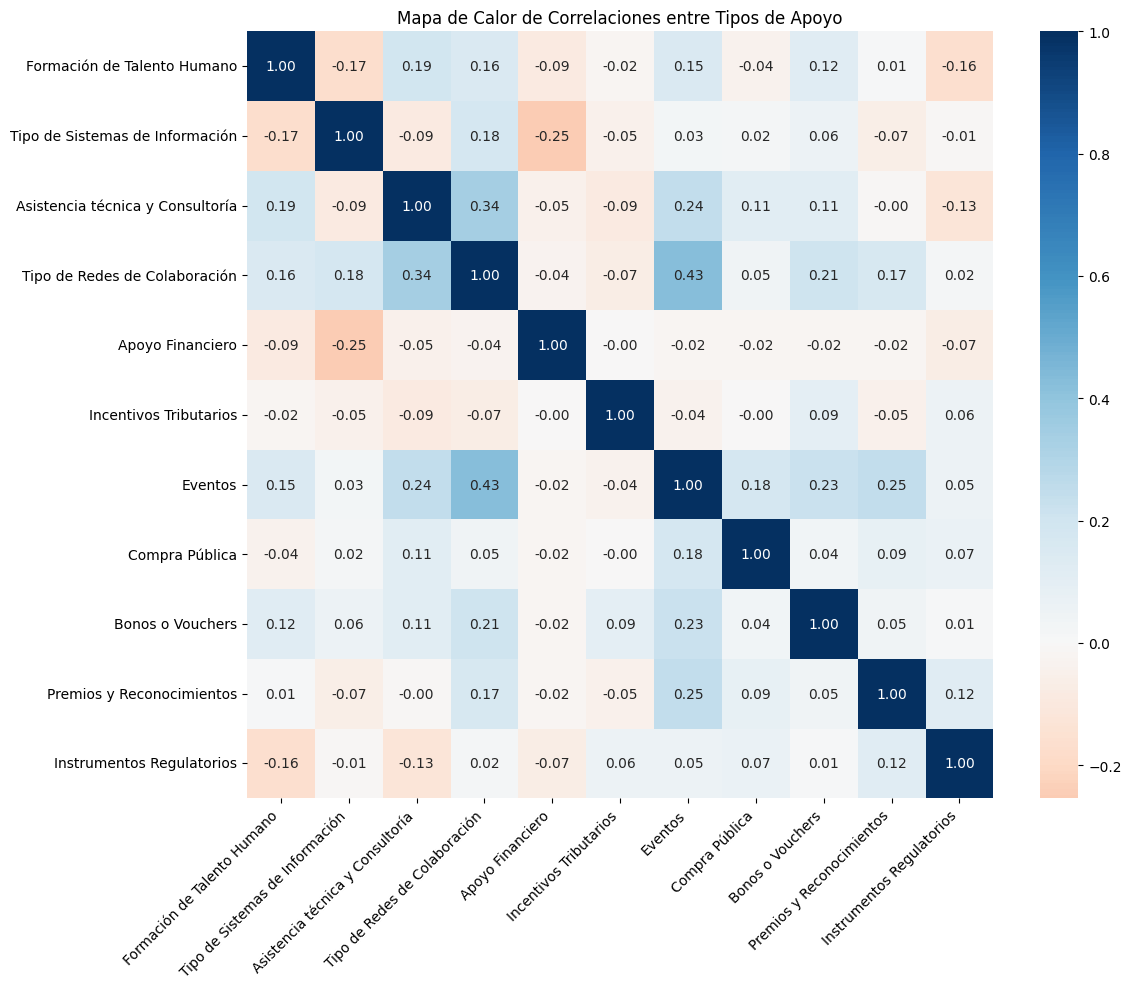


Estadísticas de correlaciones:
Correlación promedio: 0.041
Correlación máxima: 0.429
Correlación mínima: -0.254

Distribución de correlaciones:
Rango
Muy negativa          0
Negativa moderada     0
Negativa débil        4
Sin correlación      35
Positiva débil       14
Positiva moderada     2
Positiva fuerte       0
Name: count, dtype: int64


In [28]:
# 2022
"""
tipos_apoyo = ["Formación / Capacitación", 
               "Plataformas / Bases de datos / Estudios", 
               "Asesoría / Consultoría", 
               "Relacionamiento / Networking", 
               "Financiero", 
               "Incentivos Tributarios", 
               "Eventos", "Compra Pública", 
               "Bonos o Vouchers", "Premios y Reconocimientos", 
               "Instrumentos Regulatorios"]

# 2023
tipos_apoyo = ['Formación de Talento Humano', 'Tipo de Sistemas de Información', 
               'Asistencia técnica y Consultoría', 'Tipo de Redes de Colaboración', 
               'Apoyo Financiero', 'Incentivos Tributarios', 'Eventos', 'Compra Pública', 
               'Bonos o Vouchers', 'Premios y Reconocimientos', 'Instrumentos Regulatorios']


# 2024
tipos_apoyo = ['Formación de Talento Humano', 'Tipo de Sistemas de Información', 
               'Asistencia técnica y Consultoría', 'Tipo de Redes de Colaboración', 
               'Apoyo Financiero', 'Incentivos Tributarios', 'Eventos', 'Compra Pública', 
               'Bonos o Vouchers', 'Premios y Reconocimientos', 'Instrumentos Regulatorios']
"""

# 2025
tipos_apoyo = ['Formación de Talento Humano', 'Tipo de Sistemas de Información', 
               'Asistencia técnica y Consultoría', 'Tipo de Redes de Colaboración', 
               'Apoyo Financiero', 'Incentivos Tributarios', 'Eventos', 'Compra Pública', 
               'Bonos o Vouchers', 'Premios y Reconocimientos', 'Instrumentos Regulatorios']

           

tip_apo = prepare_data(data_arco, tipos_apoyo)

def get_similar_by_support_type(instrument_name, top_n=5):
    """
    Encuentra instrumentos similares basados en el tipo de usuario.
    
    Parameters:
    instrument_name (str): Nombre del instrumento a comparar
    top_n (int): Número de recomendaciones a devolver
    
    Returns:
    DataFrame: Top N instrumentos similares con sus puntuaciones y detalles
    """
    # Verificar si el instrumento existe
    if instrument_name not in data_arco['Nombre del Instrumento'].values:
        return f"El instrumento '{instrument_name}' no se encuentra en la base de datos."
    
    # Obtener el índice del instrumento
    idx = data_arco[data_arco['Nombre del Instrumento'] == instrument_name].index[0]
    
    # Calcular matriz de similitud
    sim_matrix = cosine_similarity(tip_apo)
    
    # Obtener similitudes para el instrumento específico
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # Filtrar el instrumento mismo y ordenar por similitud
    sim_scores = [x for x in sim_scores if x[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener los top N más similares
    top_indices = [x[0] for x in sim_scores[:top_n]]
    top_scores = [x[1] for x in sim_scores[:top_n]]
    
    # Crear DataFrame con resultados detallados
    recommendations = pd.DataFrame({
        'Instrumento': data_arco['Nombre del Instrumento'].iloc[top_indices],
        'Puntuación de Similitud': [f"{score:.2%}" for score in top_scores]
    })
    
    # Agregar detalles de tipos de usuario para el instrumento original
    print(f"\nTipos de apoyo para '{instrument_name}':")
    original_users = tip_apo.iloc[idx]
    for col, val in original_users.items():
        if val == 1:
            print(f"- {col}")
    
    # Agregar detalles para cada recomendación
    detailed_recommendations = []
    for i, idx in enumerate(top_indices):
        instrument_data = {
            'Instrumento': data_arco['Nombre del Instrumento'].iloc[idx],
            'Similitud': f"{top_scores[i]:.2%}",
            'Tipos de Apoyo': ', '.join([col for col, val in tip_apo.iloc[idx].items() if val == 1])
        }
        detailed_recommendations.append(instrument_data)
    
    detailed_df = pd.DataFrame(detailed_recommendations)
    
    return detailed_df

# Ejemplo de uso
instrumento = "Fábricas de Productividad y Sostenibilidad"
resultados = get_similar_by_support_type(instrumento)
print(f"\nInstrumentos más similares a '{instrumento}' según tipo de apoyo:")
print(resultados.to_string(index=False))

# Análisis adicional de la matriz de tipos de apoyo
print("\nEstadísticas de tipos de apoyo:")
user_type_stats = tip_apo.sum().sort_values(ascending=False)
print("\nNúmero de instrumentos por tipo de apoyo:")
for user_type, count in user_type_stats.items():
    print(f"{user_type}: {count}")

# Calcular correlaciones entre tipos de apoyo
#correlations = tip_apo.corr()
#print("\nCorrelaciones más fuertes entre tipos de apoyo:")
#for i in range(len(tipos_apoyo)):
#    for j in range(i+1, len(tipos_apoyo)):
#        corr = correlations.iloc[i,j]
#        if abs(corr) > 0.4:  # Mostrar solo correlaciones significativas
#            print(f"{tipos_apoyo[i]} - {tipos_apoyo[j]}: {corr:.3f}")


# Calcular correlaciones
correlations = tip_apo.corr()

# Mostrar todas las correlaciones ordenadas de mayor a menor
correlations_list = []
for i in range(len(tipos_apoyo)):
    for j in range(i+1, len(tipos_apoyo)):
        corr = correlations.iloc[i,j]
        correlations_list.append({
            'Tipo 1': tipos_apoyo[i],
            'Tipo 2': tipos_apoyo[j],
            'Correlación': corr
        })

# Convertir a DataFrame y ordenar
corr_df = pd.DataFrame(correlations_list)
corr_df = corr_df.sort_values('Correlación', ascending=False)

print("Todas las correlaciones ordenadas de mayor a menor:")
print(corr_df.to_string(index=False))

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, 
            annot=True, 
            cmap='RdBu', 
            center=0,
            fmt='.2f',
            xticklabels=tipos_apoyo,
            yticklabels=tipos_apoyo)
plt.title('Mapa de Calor de Correlaciones entre Tipos de Apoyo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis estadístico adicional
print("\nEstadísticas de correlaciones:")
print(f"Correlación promedio: {corr_df['Correlación'].mean():.3f}")
print(f"Correlación máxima: {corr_df['Correlación'].max():.3f}")
print(f"Correlación mínima: {corr_df['Correlación'].min():.3f}")

# Mostrar distribución de correlaciones por rangos
print("\nDistribución de correlaciones:")
ranges = [-1, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1]
labels = ['Muy negativa', 'Negativa moderada', 'Negativa débil', 
          'Sin correlación', 'Positiva débil', 'Positiva moderada', 'Positiva fuerte']
corr_df['Rango'] = pd.cut(corr_df['Correlación'], bins=ranges, labels=labels)
print(corr_df['Rango'].value_counts().sort_index())

## Análisis Objetivos de Política

C:\Users\supegui\AppData\Local\Temp\ipykernel_30780\782475543.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df[columns].applymap(lambda x: 1 if x in ["Si", np.nan] else 0)



Tipos de Objetivo para 'Fábricas de Productividad y Sostenibilidad':
- Transferencia de Conocimiento y Tecnología
- Comercialización
- Crecimiento Sostenible
- Comercio Electrónico

Instrumentos más similares a 'Fábricas de Productividad y Sostenibilidad' según Objetivo de Política:
                                                                                            Instrumento Similitud                                                                                                                                                                                     Tipos de Objetivo
                                               Servicio de formalización de la propiedad privada rural.    70.71%                                                                                                                                                          Crecimiento Sostenible, Comercio Electrónico
Promoción de las exportaciones y actividades comerciales para la generación de oportunidade

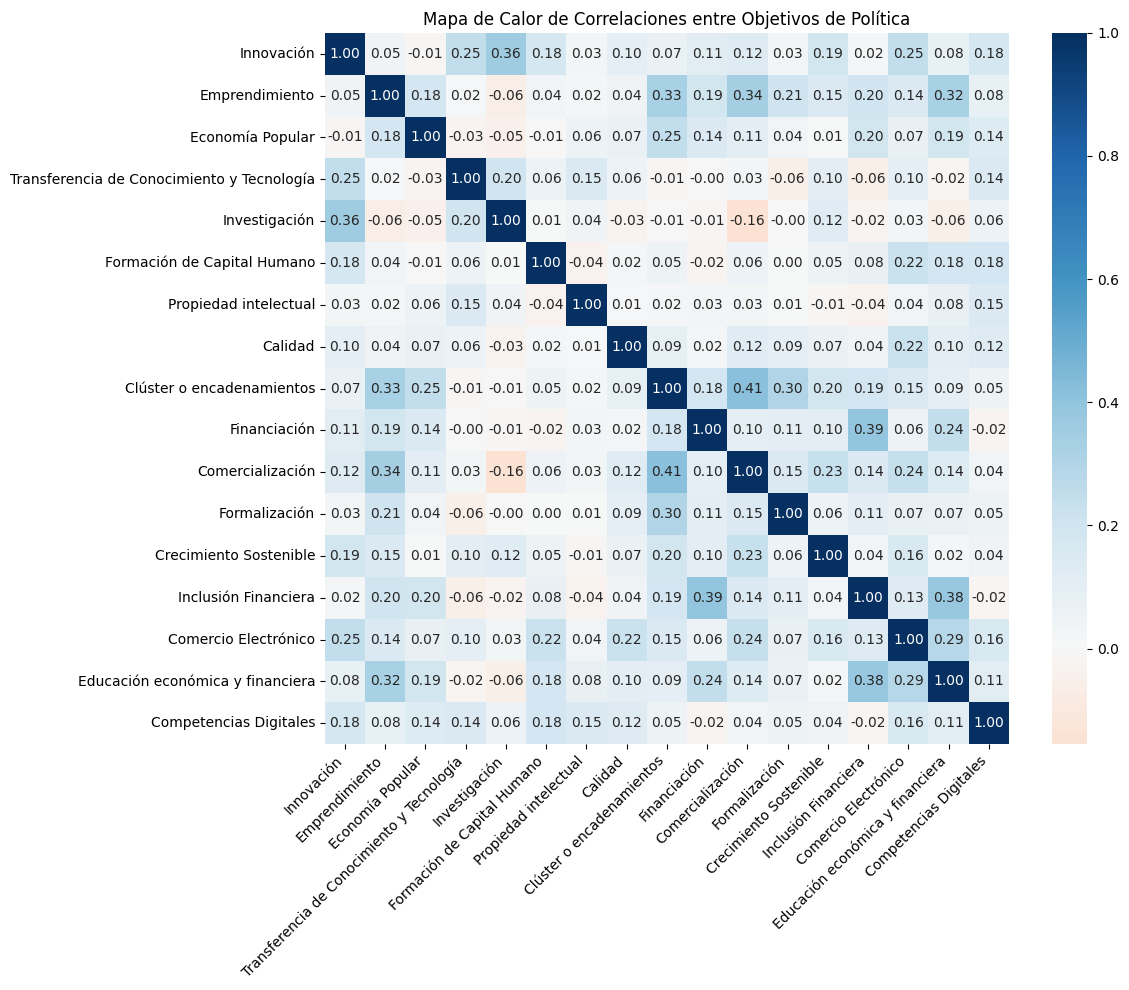


Estadísticas de correlaciones:
Correlación promedio: 0.097
Correlación máxima: 0.414
Correlación mínima: -0.155

Distribución de correlaciones:
Rango
Muy negativa          0
Negativa moderada     0
Negativa débil        1
Sin correlación      76
Positiva débil       52
Positiva moderada     7
Positiva fuerte       0
Name: count, dtype: int64


In [29]:
objetivos_politica = ["Innovación", "Emprendimiento", "Economía Popular", 
                               "Transferencia de Conocimiento y Tecnología", "Investigación", 
                               "Formación de Capital Humano", "Propiedad intelectual", "Calidad", 
                               "Clúster o encadenamientos", "Financiación", "Comercialización", 
                               "Formalización", "Crecimiento Sostenible", "Inclusión Financiera", 
                               "Comercio Electrónico", "Educación económica y financiera", 
                               "Competencias Digitales"]


obj_pol = prepare_data(data_arco, objetivos_politica)

def get_similar_by_support_type(instrument_name, top_n=5):
    """
    Encuentra instrumentos similares basados en el tipo de usuario.
    
    Parameters:
    instrument_name (str): Nombre del instrumento a comparar
    top_n (int): Número de recomendaciones a devolver
    
    Returns:
    DataFrame: Top N instrumentos similares con sus puntuaciones y detalles
    """
    # Verificar si el instrumento existe
    if instrument_name not in data_arco['Nombre del Instrumento'].values:
        return f"El instrumento '{instrument_name}' no se encuentra en la base de datos."
    
    # Obtener el índice del instrumento
    idx = data_arco[data_arco['Nombre del Instrumento'] == instrument_name].index[0]
    
    # Calcular matriz de similitud
    sim_matrix = cosine_similarity(obj_pol)
    
    # Obtener similitudes para el instrumento específico
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # Filtrar el instrumento mismo y ordenar por similitud
    sim_scores = [x for x in sim_scores if x[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener los top N más similares
    top_indices = [x[0] for x in sim_scores[:top_n]]
    top_scores = [x[1] for x in sim_scores[:top_n]]
    
    # Crear DataFrame con resultados detallados
    recommendations = pd.DataFrame({
        'Instrumento': data_arco['Nombre del Instrumento'].iloc[top_indices],
        'Puntuación de Similitud': [f"{score:.2%}" for score in top_scores]
    })
    
    # Agregar detalles de tipos de usuario para el instrumento original
    print(f"\nTipos de Objetivo para '{instrument_name}':")
    original_objetives = obj_pol.iloc[idx]
    for col, val in original_objetives.items():
        if val == 1:
            print(f"- {col}")
    
    # Agregar detalles para cada recomendación
    detailed_recommendations = []
    for i, idx in enumerate(top_indices):
        instrument_data = {
            'Instrumento': data_arco['Nombre del Instrumento'].iloc[idx],
            'Similitud': f"{top_scores[i]:.2%}",
            'Tipos de Objetivo': ', '.join([col for col, val in obj_pol.iloc[idx].items() if val == 1])
        }
        detailed_recommendations.append(instrument_data)
    
    detailed_df = pd.DataFrame(detailed_recommendations)
    
    return detailed_df

# Ejemplo de uso
instrumento = "Fábricas de Productividad y Sostenibilidad"
resultados = get_similar_by_support_type(instrumento)
print(f"\nInstrumentos más similares a '{instrumento}' según Objetivo de Política:")
print(resultados.to_string(index=False))

# Análisis adicional de la matriz de tipos de apoyo
print("\nEstadísticas de tipos de apoyo:")
user_type_stats = tip_apo.sum().sort_values(ascending=False)
print("\nNúmero de instrumentos por Objetivo de Política:")
for user_type, count in user_type_stats.items():
    print(f"{user_type}: {count}")

# Calcular correlaciones entre tipos de apoyo
#correlations = tip_apo.corr()
#print("\nCorrelaciones más fuertes entre tipos de apoyo:")
#for i in range(len(tipos_apoyo)):
#    for j in range(i+1, len(tipos_apoyo)):
#        corr = correlations.iloc[i,j]
#        if abs(corr) > 0.4:  # Mostrar solo correlaciones significativas
#            print(f"{tipos_apoyo[i]} - {tipos_apoyo[j]}: {corr:.3f}")


# Calcular correlaciones
correlations = obj_pol.corr()

# Mostrar todas las correlaciones ordenadas de mayor a menor
correlations_list = []
for i in range(len(objetivos_politica)):
    for j in range(i+1, len(objetivos_politica)):
        corr = correlations.iloc[i,j]
        correlations_list.append({
            'Tipo 1': objetivos_politica[i],
            'Tipo 2': objetivos_politica[j],
            'Correlación': corr
        })

# Convertir a DataFrame y ordenar
corr_df = pd.DataFrame(correlations_list)
corr_df = corr_df.sort_values('Correlación', ascending=False)

print("Todas las correlaciones ordenadas de mayor a menor:")
print(corr_df.to_string(index=False))

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, 
            annot=True, 
            cmap='RdBu', 
            center=0,
            fmt='.2f',
            xticklabels=objetivos_politica,
            yticklabels=objetivos_politica)
plt.title('Mapa de Calor de Correlaciones entre Objetivos de Política')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis estadístico adicional
print("\nEstadísticas de correlaciones:")
print(f"Correlación promedio: {corr_df['Correlación'].mean():.3f}")
print(f"Correlación máxima: {corr_df['Correlación'].max():.3f}")
print(f"Correlación mínima: {corr_df['Correlación'].min():.3f}")

# Mostrar distribución de correlaciones por rangos
print("\nDistribución de correlaciones:")
ranges = [-1, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1]
labels = ['Muy negativa', 'Negativa moderada', 'Negativa débil', 
          'Sin correlación', 'Positiva débil', 'Positiva moderada', 'Positiva fuerte']
corr_df['Rango'] = pd.cut(corr_df['Correlación'], bins=ranges, labels=labels)
print(corr_df['Rango'].value_counts().sort_index())